# Agglomerative Clustering en Random Forrest


## importeren van libraries

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import glob
import datetime
# modellen importeren
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# installeer de library met alle modellen als dit nog niet gedaan is
!pip install scikit-learn

## Verbinden met de database om de data in te laden

In [89]:
# Maak verbinding met de database
con = sqlite3.connect(r"D:\Code\Notebooks\SCADA_Bruggen") # zet hier het path naar je eigen database
cur = con.cursor()

'''
Laad de data van een brug uit de database
WHERE = data inladen vanaf 2016, als je dit niet begrijpt hoe het werkt is het geen probleem
De limit geeft aan dat je maar een bepaald aantal lines wil laden
'''

df = pd.read_sql("SELECT * FROM WD ", con)
con.close()

In [90]:
df['Tijd'] = pd.to_datetime(df['Tijd'])
df['Storing'] = (df.Type == "CAME").astype('int')

## Opzetten Dataframes

In [91]:
WeerData = df[df['Omschrijving'].str.contains("Meteo")]

In [92]:
Windrichting = WeerData[WeerData['Omschrijving'] == "Meteo Actuele Windrichting" ]
Windrichting['Waarde'].astype('float').describe()

count    408633.000000
mean        174.573537
std          76.734158
min         -45.000000
25%         109.000000
50%         178.000000
75%         234.000000
max         358.000000
Name: Waarde, dtype: float64

In [93]:
Windrichting['Waarde'] = Windrichting['Waarde'].astype("float")
Windrichting['WRFix'] = Windrichting['Waarde'].where((Windrichting["Waarde"] < 337.5), (Windrichting["Waarde"] - 360.0) , axis = 0)

C:\Users\denni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\denni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [94]:
testnoord = Windrichting[Windrichting['WRFix'] < 0]
testnoord

,index,Tijd,Type,Klasse,Waarde,ID,Omschrijving,Status,Prioriteit,Tijd came,Tijd went,Tijd ack,Gebr.ID,DPE,Storing,WRFix
18519,18519,2015-12-17 22:54:31.299,PROCES,NaN,344.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,-16.0
18645,18645,2015-12-17 21:41:09.317,PROCES,NaN,347.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,-13.0
20012,20012,2015-12-17 18:26:11.496,PROCES,NaN,350.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,-10.0
22529,22529,2015-12-17 16:06:12.106,PROCES,NaN,348.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,-12.0
22619,22619,2015-12-17 15:13:37.993,PROCES,NaN,339.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,-21.0
22645,22645,2015-12-17 14:59:24.883,PROCES,NaN,338.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,-22.0
24225,24225,2015-12-17 09:53:05.643,PROCES,NaN,340.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,-20.0
26091,26091,2015-12-17 07:24:23.835,PROCES,NaN,356.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,-4.0
28965,28965,2015-12-18 23:04:25.691,PROCES,NaN,349.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,-11.0
28986,28986,2015-12-18 22:52:15.491,PROCES,NaN,339.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,-21.0


In [95]:
Windrichting['WRFix'].describe()

count    408633.000000
mean        173.363943
std          76.838565
min         -45.000000
25%         108.000000
50%         176.000000
75%         234.000000
max         337.000000
Name: WRFix, dtype: float64

In [96]:
wrtest = Windrichting[Windrichting['Waarde'].astype('float') > 300]
wrtest

,index,Tijd,Type,Klasse,Waarde,ID,Omschrijving,Status,Prioriteit,Tijd came,Tijd went,Tijd ack,Gebr.ID,DPE,Storing,WRFix
6131,6131,2015-12-15 14:59:10.892,PROCES,NaN,301.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,301.0
7232,7232,2015-12-16 20:38:45.627,PROCES,NaN,313.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,313.0
11673,11673,2015-12-16 14:11:17.079,PROCES,NaN,302.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,302.0
11715,11715,2015-12-16 13:46:37.705,PROCES,NaN,306.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,306.0
11721,11721,2015-12-16 13:42:35.776,PROCES,NaN,313.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,313.0
15804,15804,2015-12-16 09:34:14.168,PROCES,NaN,301.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,301.0
16044,16044,2015-12-16 08:14:55.193,PROCES,NaN,309.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,309.0
17224,17224,2015-12-16 07:09:34.778,PROCES,NaN,312.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,312.0
17322,17322,2015-12-16 06:33:02.069,PROCES,NaN,324.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,324.0
18491,18491,2015-12-17 23:10:48.130,PROCES,NaN,329.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,329.0


In [97]:
Windrichting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408633 entries, 634 to 4108305
Data columns (total 16 columns):
index           408633 non-null int64
Tijd            408633 non-null datetime64[ns]
Type            408633 non-null object
Klasse          0 non-null float64
Waarde          408633 non-null float64
ID              0 non-null float64
Omschrijving    408633 non-null object
Status          0 non-null object
Prioriteit      0 non-null object
Tijd came       0 non-null object
Tijd went       0 non-null object
Tijd ack        0 non-null object
Gebr.ID         408633 non-null object
DPE             408633 non-null object
Storing         408633 non-null int32
WRFix           408633 non-null float64
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(9)
memory usage: 51.4+ MB


In [98]:
Windrichting['Tijd'].groupby(Windrichting['Tijd'].dt.date).count()

Tijd
2015-12-15     291
2015-12-16     704
2015-12-17     707
2015-12-18     705
2015-12-19     708
2015-12-20     708
2015-12-21     706
2015-12-22     707
2015-12-23     692
2015-12-24     705
2015-12-25     706
2015-12-26     706
2015-12-27     706
2015-12-28     700
2015-12-29     706
2015-12-30     706
2015-12-31     707
2016-01-01     672
2016-01-02     673
2016-01-03     677
2016-01-04     676
2016-01-05     638
2016-01-06     563
2016-01-07     547
2016-01-08     563
2016-01-09     479
2016-01-10     593
2016-01-11     575
2016-01-12     367
2016-01-20     310
              ... 
2018-09-26    2463
2018-09-27    3397
2018-09-28    9204
2018-09-29    6263
2018-09-30    4253
2018-10-20    3236
2018-10-21    3654
2018-10-22    6784
2018-10-23    1248
2018-10-24    2301
2018-10-25    1306
2018-10-26    1065
2018-10-27    3979
2018-10-28    6709
2018-10-29    8197
2018-10-30    3553
2018-10-31    2414
2018-11-18    2798
2018-11-19    4811
2018-11-20    2758
2018-11-21    2899
2018-11

In [99]:
windkracht = WeerData[WeerData['Omschrijving'] == "Meteo Actuele Windkracht" ]
windkracht['Waarde'] = windkracht['Waarde'].astype("float")
windkracht['Waarde'].describe()

C:\Users\denni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    249441.000000
mean          1.936520
std           1.285269
min          -0.065104
25%           0.991030
50%           1.681496
75%           2.591146
max          14.105903
Name: Waarde, dtype: float64

In [100]:
df.shape

(4108308, 15)

## Windrichting histogram

([<matplotlib.axis.XTick at 0x252411b1c88>,
 <a list of 8 Text xticklabel objects>)

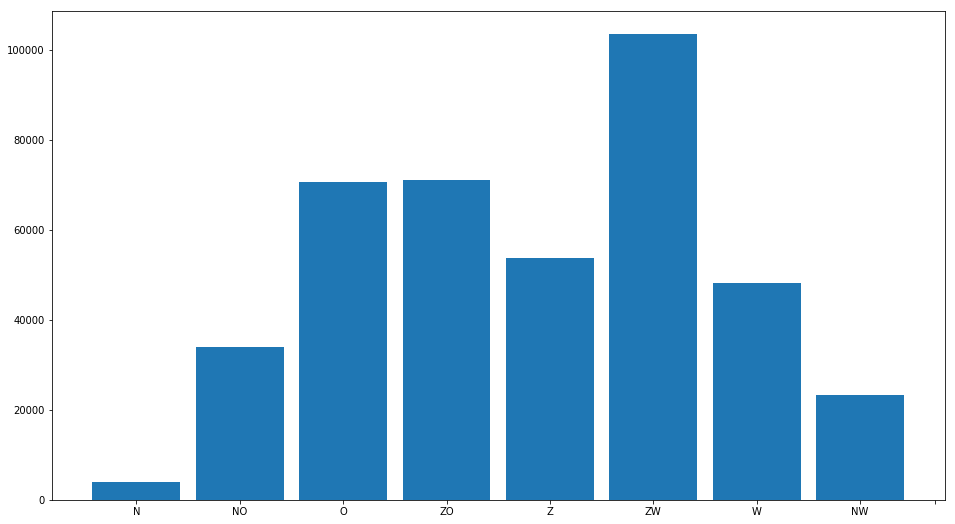

In [101]:
plt.rcParams["figure.figsize"] = (16,9)
plt.hist(Windrichting['WRFix'], bins = [(-22.5) , 22.5, 67.5, 112.5, 157.5,  202.5, 247.5, 292.5, 337.5] ,rwidth=0.85)
plt.xticks([0, 45, 90, 135, 180, 225, 270, 315, 347.5], ('N','NO' , 'O','ZO' ,'Z' ,'ZW','W','NW'))

# Nieuw dataframe maken voor het model

In [102]:
dfdaily = pd.DataFrame(df['Tijd'].groupby(df['Tijd'].dt.date).count()).rename({'Tijd': 'totaal meldingen'}, axis=1)
dfdaily['aantal storingen'] = df.groupby(df['Tijd'].dt.date)['Storing'].sum()

In [103]:
dfdaily.shape

(1082, 2)

In [104]:
idx = pd.date_range('12-12-2015', '12-07-2018')
dfdaily = dfdaily.reindex(idx, fill_value = 0)

# Windkracht

In [105]:
windkracht.head()

,index,Tijd,Type,Klasse,Waarde,ID,Omschrijving,Status,Prioriteit,Tijd came,Tijd went,Tijd ack,Gebr.ID,DPE,Storing
633,633,2015-12-15 23:59:08.929,PROCES,NaN,1.671007,NaN,Meteo Actuele Windkracht,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windkracht.Actueel,0
636,636,2015-12-15 23:57:07.053,PROCES,NaN,1.931424,NaN,Meteo Actuele Windkracht,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windkracht.Actueel,0
640,640,2015-12-15 23:55:06.253,PROCES,NaN,1.453993,NaN,Meteo Actuele Windkracht,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windkracht.Actueel,0
642,642,2015-12-15 23:53:05.453,PROCES,NaN,1.996528,NaN,Meteo Actuele Windkracht,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windkracht.Actueel,0
646,646,2015-12-15 23:51:03.553,PROCES,NaN,2.105035,NaN,Meteo Actuele Windkracht,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windkracht.Actueel,0


In [106]:
kracht = windkracht.groupby(windkracht['Tijd'].dt.date)['Waarde'].mean()
idx = pd.date_range('12-12-2015', '12-07-2018')
kracht = kracht.reindex(idx, fill_value = 1.8)

In [107]:
dfdaily['WK'] = kracht

# Windrichting 

In [193]:
test = Windrichting.groupby(Windrichting['Tijd'].dt.date)['WRFix'].mean()

In [194]:
test

Tijd
2015-12-15    129.0
2015-12-16    204.0
2015-12-17    215.0
2015-12-18    224.0
2015-12-19    173.0
2015-12-20    184.5
2015-12-21    225.0
2015-12-22    224.0
2015-12-23    219.5
2015-12-24    188.0
2015-12-25    212.5
2015-12-26    224.0
2015-12-27    224.0
2015-12-28    121.0
2015-12-29    147.0
2015-12-30    138.0
2015-12-31    187.0
2016-01-01    134.0
2016-01-02    233.0
2016-01-03    163.0
2016-01-04     82.0
2016-01-05    275.0
2016-01-06    279.0
2016-01-07    212.0
2016-01-08    225.0
2016-01-09    228.0
2016-01-10    163.0
2016-01-11    217.0
2016-01-12    227.0
2016-01-20    225.0
              ...  
2018-09-26    181.0
2018-09-27    195.0
2018-09-28    193.0
2018-09-29    127.0
2018-09-30    220.0
2018-10-20    144.0
2018-10-21    140.0
2018-10-22    234.0
2018-10-23    249.0
2018-10-24    266.0
2018-10-25    242.0
2018-10-26    220.0
2018-10-27    191.0
2018-10-28     93.0
2018-10-29    106.0
2018-10-30    145.0
2018-10-31    155.0
2018-11-18     81.0
2018-11-19     

In [195]:
idx = pd.date_range('12-12-2015', '12-07-2018')
test = test.reindex(idx, fill_value = 230)

In [196]:
test.describe()

count    1092.000000
mean      211.770604
std        44.521839
min         7.500000
25%       220.000000
50%       230.000000
75%       230.000000
max       297.000000
Name: WRFix, dtype: float64

In [197]:
dfdaily['WRFix'] = test
dfdaily['WRFix'].describe()

count    1092.000000
mean      211.770604
std        44.521839
min         7.500000
25%       220.000000
50%       230.000000
75%       230.000000
max       297.000000
Name: WRFix, dtype: float64

In [198]:
dfdaily['N'] = ((dfdaily.WRFix >= -22.5) & (dfdaily.WRFix <= 22.5)).astype('int')
dfdaily['NO'] = ((dfdaily.WRFix >=22.6) & (dfdaily.WRFix <= 67.5)).astype('int')
dfdaily['O'] = ((dfdaily.WRFix >=67.6) & (dfdaily.WRFix <= 112.5)).astype('int')
dfdaily['ZO'] = ((dfdaily.WRFix >=112.6) & (dfdaily.WRFix <= 157.5)).astype('int')
dfdaily['Z'] = ((dfdaily.WRFix >=157.6) & (dfdaily.WRFix <= 202.5)).astype('int')
dfdaily['ZW'] = ((dfdaily.WRFix >=202.6) & (dfdaily.WRFix <= 247.2)).astype('int')
dfdaily['W'] = ((dfdaily.WRFix>=247.6) & (dfdaily.WRFix <= 292.5)).astype('int')
dfdaily['NW'] = ((dfdaily.WRFix >=292.6) & (dfdaily.WRFix <= 337.5)).astype('int')

In [183]:
dfdaily['N'].sum()

2

## Plot het aantal storingen tegenover het totaal aantal meldingen

Je zou hier eigenlijk een lineair verband verwachten

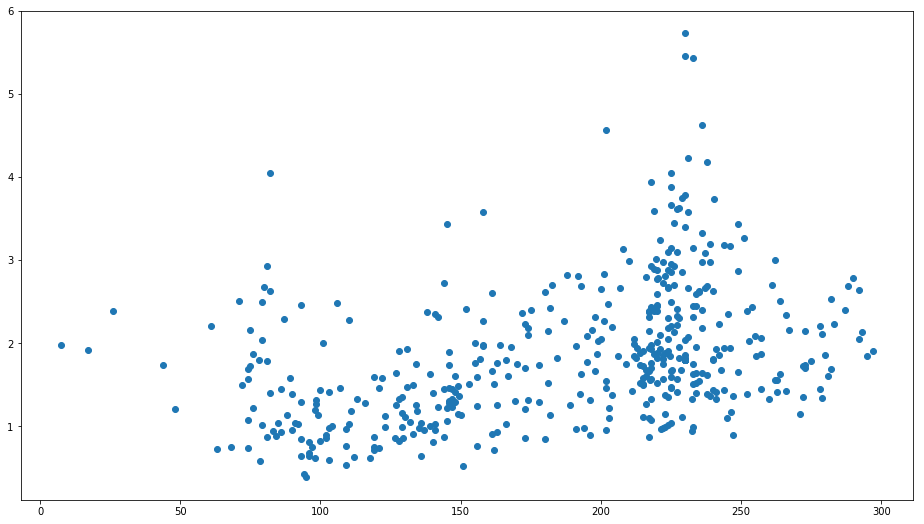

In [199]:
plt.figure(figsize=(16,9))
plt.scatter(dfdaily['WRFix'],  dfdaily['WK'])

# Maak het model


## Random Forrest Ensemble model

In [200]:
# n_estimators is het aantal keer dat hij het model probeert op de data
RFmodel = RandomForestRegressor(n_estimators = 100)

## Het model trainen om foutmeldingen te voorspellen met windrichting

In [201]:
RFmodel.fit(dfdaily[['totaal meldingen', 'N', 'NO', 'O', 'ZO', 'Z', 'ZW', 'W', 'NW']],  dfdaily['aantal storingen'])
dfdaily['PreSto'] = RFmodel.predict(dfdaily[['totaal meldingen', 'N', 'NO', 'O', 'ZO', 'Z', 'ZW', 'W', 'NW']])

## Scatterplot van het model

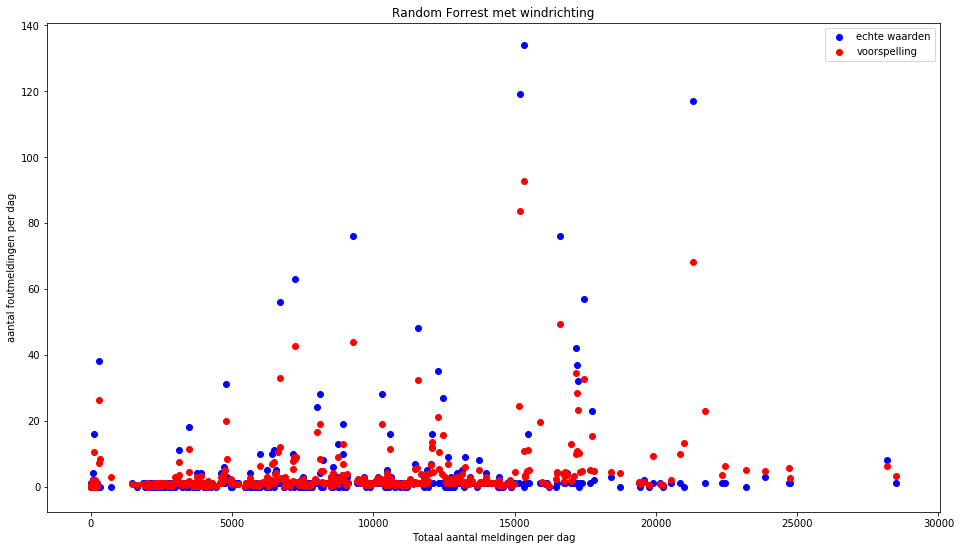

In [202]:
# In deze plot vergelijk je de echte waarden met de waarden die het model voorspelt
plt.figure(figsize=(16,9))
# Scatter waarin de meldingen en het aantal storingen tegen elkaar staan
plt.scatter(dfdaily['totaal meldingen'],  dfdaily['aantal storingen'], color = 'blue')

# Scatter waarin de meldingen en de voorspelling tegen elkaar staan
plt.scatter(dfdaily['totaal meldingen'],  dfdaily['PreSto'], color = "red")

# opmaak shizzle
plt.title("Random Forrest met windrichting")
plt.xlabel("Totaal aantal meldingen per dag")
plt.ylabel("aantal foutmeldingen per dag")
plt.legend(('echte waarden','voorspelling'))

## Model trainen om windrichting te voorspellen

In [203]:
RFmodel.fit(dfdaily[['totaal meldingen', 'N', 'NO', 'O', 'ZO', 'Z', 'ZW', 'W', 'NW']],  dfdaily['WRFix'])
dfdaily['PreWR'] = RFmodel.predict(dfdaily[['totaal meldingen', 'N', 'NO', 'O', 'ZO', 'Z', 'ZW', 'W', 'NW']])

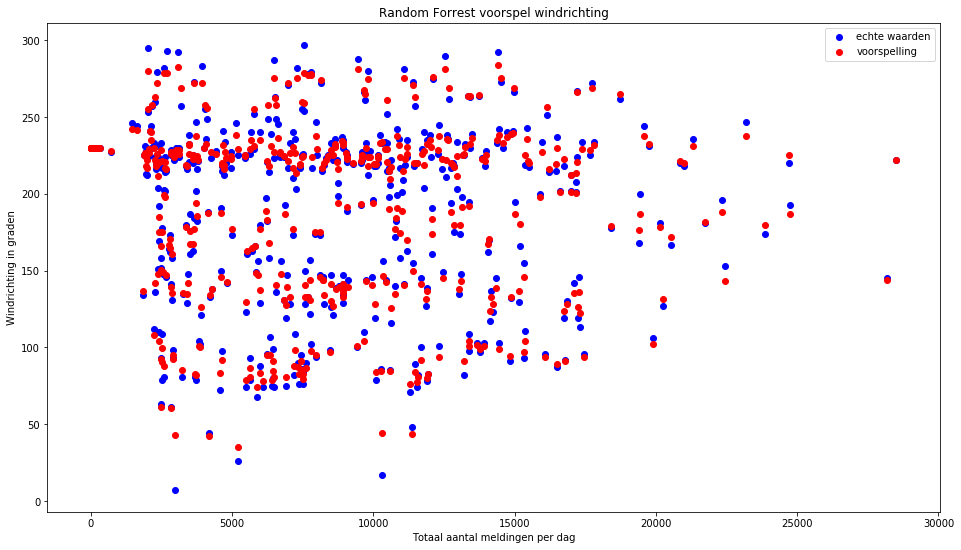

In [204]:
# In deze plot vergelijk je de echte waarden met de waarden die het model voorspelt
plt.figure(figsize=(16,9))
# Scatter waarin de meldingen en het aantal storingen tegen elkaar staan
plt.scatter(dfdaily['totaal meldingen'],  dfdaily['WRFix'], color = 'blue')

# Scatter waarin de meldingen en de voorspelling tegen elkaar staan
plt.scatter(dfdaily['totaal meldingen'],  dfdaily['PreWR'], color = "red")

# opmaak shizzle
plt.title("Random Forrest voorspel windrichting")
plt.xlabel("Totaal aantal meldingen per dag")
plt.ylabel("Windrichting in graden")
plt.legend(('echte waarden','voorspelling'))

## Windkracht voorspellen a.d.v windrichting

In [205]:
RFWKmodel = RandomForestRegressor(n_estimators = 100)
RFWKmodel.fit(dfdaily[['WRFix', 'N', 'NO', 'O', 'ZO', 'Z', 'ZW', 'W', 'NW']],  dfdaily['WK'])
dfdaily['preWKbin'] = RFWKmodel.predict(dfdaily[['WRFix', 'N', 'NO', 'O', 'ZO', 'Z', 'ZW', 'W', 'NW']])

In [206]:
RFWK2model = RandomForestRegressor(n_estimators = 100)
RFWK2model.fit(dfdaily[['WRFix']],  dfdaily['WK'])
dfdaily['preWK'] = RFWK2model.predict(dfdaily[['WRFix']])

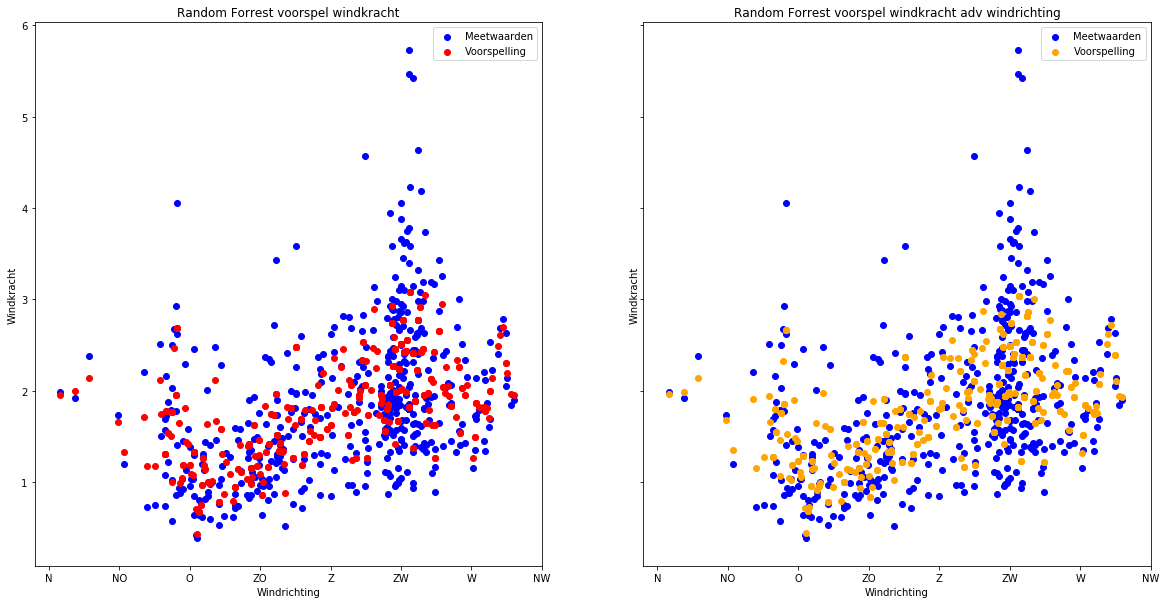

In [207]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,10))

s1 = ax1.scatter(dfdaily['WRFix'],  dfdaily['WK'], color = 'blue')
s2 = ax1.scatter(dfdaily['WRFix'],  dfdaily['preWK'], color = "red")
ax1.set_title('Random Forrest voorspel windkracht')
ax1.set_xlabel("Windrichting")
ax1.set_ylabel("Windkracht")
ax1.set_xticks([0, 45, 90, 135, 180, 225, 270, 315])
ax1.set_xticklabels(('N','NO' , 'O','ZO' ,'Z' ,'ZW','W','NW'))
ax1.legend([s1,s2],['Meetwaarden', 'Voorspelling'], loc="upper right")

s3 = ax2.scatter(dfdaily['WRFix'],  dfdaily['WK'], color = 'blue')
s4 = ax2.scatter(dfdaily['WRFix'],  dfdaily['preWKbin'], color = "orange")
ax2.set_title('Random Forrest voorspel windkracht adv windrichting')
ax2.set_xlabel("Windrichting")
ax2.set_ylabel("Windkracht")
ax2.set_xticks([0, 45, 90, 135, 180, 225, 270, 315])
ax2.set_xticklabels(('N','NO' , 'O','ZO' ,'Z' ,'ZW','W','NW'))
ax2.legend([s3,s4],['Meetwaarden', 'Voorspelling'], loc="upper right")


In [208]:
dfdaily['wk error'] = (dfdaily['WK'] - dfdaily['preWK']).abs()
dfdaily['wk error met wr'] = (dfdaily['WK'] - dfdaily['preWKbin']).abs()

In [209]:
dfdaily['WRFix'].astype('float').describe()

count    1092.000000
mean      211.770604
std        44.521839
min         7.500000
25%       220.000000
50%       230.000000
75%       230.000000
max       297.000000
Name: WRFix, dtype: float64

In [210]:
dfdaily.head()

,totaal meldingen,aantal storingen,WK,WRFix,N,NO,O,ZO,Z,ZW,...,weekdag,maandag,dinsdag,woensdag,donderdag,vrijdag,zaterdag,zondag,preWD,WD error
2015-12-12,8,0,1.800000,230.0,0,0,0,0,0,1,...,5,0,0,0,0,0,1,0,1.800000,8.659740e-15
2015-12-13,4,0,1.800000,230.0,0,0,0,0,0,1,...,6,0,0,0,0,0,0,1,1.800000,8.659740e-15
2015-12-14,86,0,1.800000,230.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1.800000,8.659740e-15
2015-12-15,5995,0,1.349546,129.0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1.371372,2.182573e-02
2015-12-16,11780,0,2.197656,204.0,0,0,0,0,0,1,...,2,0,0,1,0,0,0,0,2.168988,2.866739e-02


In [211]:
dfdaily.mean()

totaal meldingen    3761.470696
aantal storingen       1.621795
WK                     1.826941
WRFix                211.770604
N                      0.001832
NO                     0.004579
O                      0.062271
ZO                     0.069597
Z                      0.060440
ZW                     0.757326
W                      0.041209
NW                     0.002747
PreSto                 1.598900
PreWR                211.751085
preWK                  1.829038
wk error               0.187650
wk error met wr        0.186608
preWKbin               1.826148
weekdag                3.000000
maandag                0.142857
dinsdag                0.142857
woensdag               0.142857
donderdag              0.142857
vrijdag                0.142857
zaterdag               0.142857
zondag                 0.142857
preWD                  1.832464
WD error               0.094595
dtype: float64

# Agglomerative clustering

In [212]:
Ward = AgglomerativeClustering(linkage='ward', n_clusters=8)
Average = AgglomerativeClustering(linkage='average', n_clusters=8)
Complete = AgglomerativeClustering(linkage = 'complete', n_clusters=8)
Single = AgglomerativeClustering(linkage = 'single', n_clusters=8)
scal = StandardScaler()

In [213]:
features = scal.fit_transform(dfdaily[['WK','WRFix']].astype(np.float64))
AvgClust = Average.fit(features)
WardClust = Ward.fit(features)
SingleClust = Single.fit(features)
CompClust = Complete.fit(features)

Text(0.5, 0.98, 'Agglomerative clustering voor alle linkages met Windrichting tegen Windkracht')

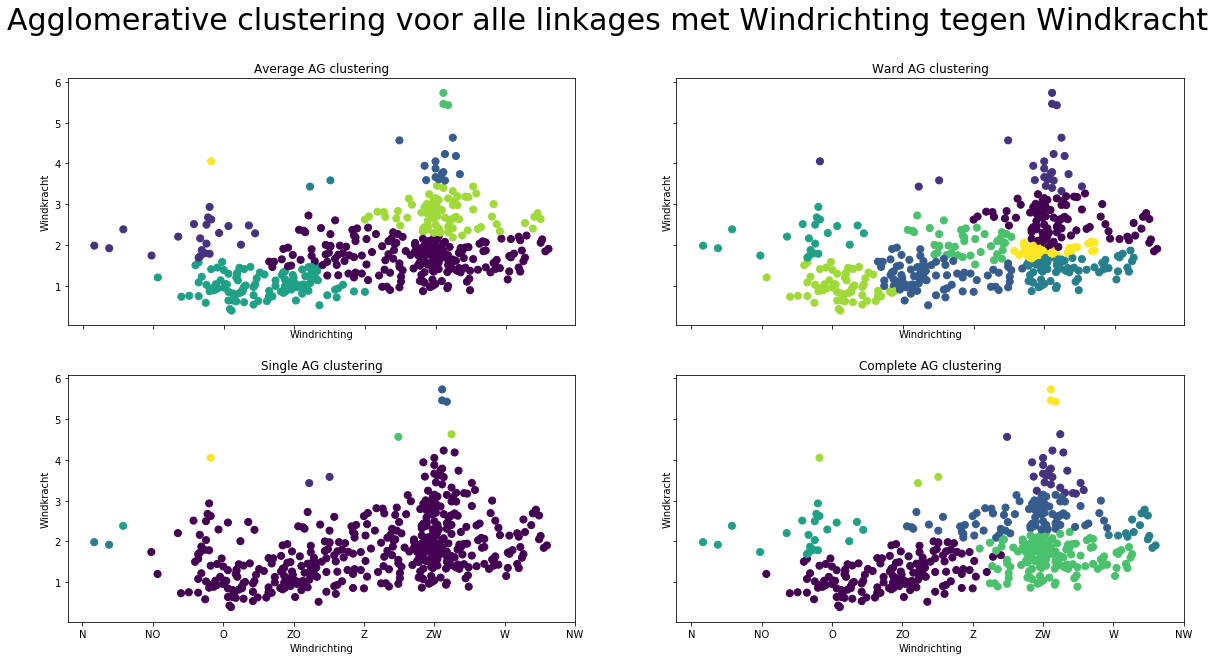

In [214]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, sharex='col',sharey= 'row', figsize=(20,10))

s1 = ax1.scatter(dfdaily['WRFix'],  dfdaily['WK'], c= AvgClust.labels_, s=50, cmap='viridis')
ax1.set_title('Average AG clustering')
ax1.set_xlabel("Windrichting")
ax1.set_ylabel("Windkracht")
ax2.set_xticks([0, 45, 90, 135, 180, 225, 270, 315])

s2 = ax2.scatter(dfdaily['WRFix'],  dfdaily['WK'], c= WardClust.labels_, s=50, cmap='viridis')
ax2.set_title('Ward AG clustering')
ax2.set_xlabel("Windrichting")
ax2.set_ylabel("Windkracht")
ax2.set_xticks([0, 45, 90, 135, 180, 225, 270, 315])

s3 = ax3.scatter(dfdaily['WRFix'],  dfdaily['WK'], c= SingleClust.labels_, s=50, cmap='viridis')
ax3.set_title('Single AG clustering')
ax3.set_xlabel("Windrichting")
ax3.set_ylabel("Windkracht")
ax3.set_xticks([0, 45, 90, 135, 180, 225, 270, 315])
ax3.set_xticklabels(('N','NO' , 'O','ZO' ,'Z' ,'ZW','W','NW'))

s1 = ax4.scatter(dfdaily['WRFix'],  dfdaily['WK'], c= CompClust.labels_, s=50, cmap='viridis')
ax4.set_title('Complete AG clustering')
ax4.set_xlabel("Windrichting")
ax4.set_ylabel("Windkracht")
ax4.set_xticks([0, 45, 90, 135, 180, 225, 270, 315])
ax4.set_xticklabels(('N','NO' , 'O','ZO' ,'Z' ,'ZW','W','NW'))
f.suptitle('Agglomerative clustering voor alle linkages met Windrichting tegen Windkracht', fontsize=30)

# AggClust test met meer dan 2 dimensies

In [215]:
WardTest = AgglomerativeClustering(linkage='ward', n_clusters=8)
AverageTest = AgglomerativeClustering(linkage='average', n_clusters=8)
CompleteTest = AgglomerativeClustering(linkage = 'complete', n_clusters=8)
SingleTest = AgglomerativeClustering(linkage = 'single', n_clusters=8)
scal = StandardScaler()

In [216]:
features = scal.fit_transform(dfdaily[['WK','WRFix', 'N','NO','O','ZO' ,'Z' ,'ZW','W','NW']].astype(np.float64))
AvgClustTest = AverageTest.fit(features)
WardClustTest= WardTest.fit(features)
SingleClustTest = SingleTest.fit(features)
CompClustTest = CompleteTest.fit(features)

Text(0.5, 0.98, 'Agglomerative clustering voor alle linkages, Windrichting tegen Windracht met bins')

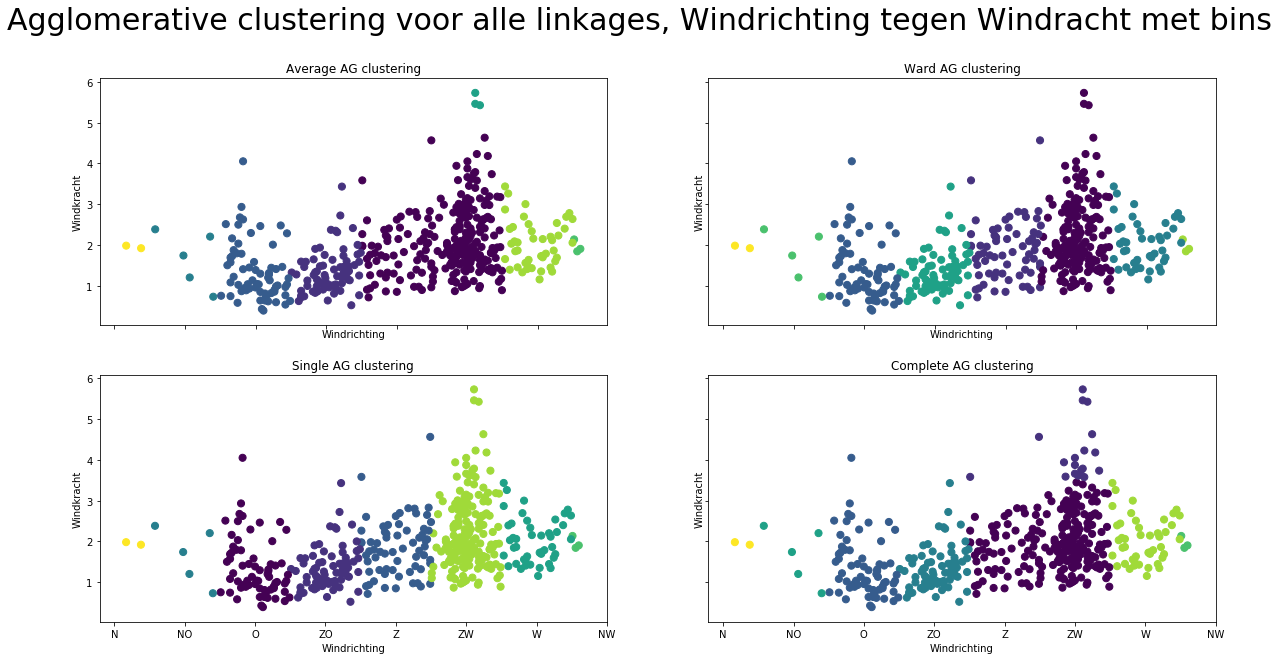

In [217]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, sharex='col',sharey= 'row', figsize=(20,10))

s1 = ax1.scatter(dfdaily['WRFix'],  dfdaily['WK'], c= AvgClustTest.labels_, s=50, cmap='viridis')
ax1.set_title('Average AG clustering')
ax1.set_xlabel("Windrichting")
ax1.set_ylabel("Windkracht")
ax2.set_xticks([0, 45, 90, 135, 180, 225, 270, 315])

s2 = ax2.scatter(dfdaily['WRFix'],  dfdaily['WK'], c= WardClustTest.labels_, s=50, cmap='viridis')
ax2.set_title('Ward AG clustering')
ax2.set_xlabel("Windrichting")
ax2.set_ylabel("Windkracht")
ax2.set_xticks([0, 45, 90, 135, 180, 225, 270, 315])

s3 = ax3.scatter(dfdaily['WRFix'],  dfdaily['WK'], c= SingleClustTest.labels_, s=50, cmap='viridis')
ax3.set_title('Single AG clustering')
ax3.set_xlabel("Windrichting")
ax3.set_ylabel("Windkracht")
ax3.set_xticks([0, 45, 90, 135, 180, 225, 270, 315])
ax3.set_xticklabels(('N','NO' , 'O','ZO' ,'Z' ,'ZW','W','NW'))

s1 = ax4.scatter(dfdaily['WRFix'],  dfdaily['WK'], c= CompClustTest.labels_, s=50, cmap='viridis')
ax4.set_title('Complete AG clustering')
ax4.set_xlabel("Windrichting")
ax4.set_ylabel("Windkracht")
ax4.set_xticks([0, 45, 90, 135, 180, 225, 270, 315])
ax4.set_xticklabels(('N','NO' , 'O','ZO' ,'Z' ,'ZW','W','NW'))
f.suptitle('Agglomerative clustering voor alle linkages, Windrichting tegen Windracht met bins', fontsize=30)

## Model waarbij je rekening houdt met de dagen van de week

In [218]:
'''
nieuwe kolom met daarin de datums van het type object
'''
dfdaily['datum'] = dfdaily.index

In [219]:
'''
een nieuw kolom met daarin de dag van de week 
ranged van 0-6
0 = maandag 
6 = zondag
'''
dfdaily['weekdag'] = pd.to_datetime(dfdaily.datum).dt.dayofweek

In [220]:
'''
Per dag een nieuwe kolom met daarin een bool die aangeeft of het die dag van de week is, 
omgezet naar een int om makkelijker mee te  rekenen
'''

dfdaily['maandag'] = (pd.to_datetime(dfdaily.datum).dt.dayofweek == 0).astype('int')
dfdaily['dinsdag'] = (pd.to_datetime(dfdaily.datum).dt.dayofweek == 1).astype('int')
dfdaily['woensdag'] = (pd.to_datetime(dfdaily.datum).dt.dayofweek == 2).astype('int')
dfdaily['donderdag'] = (pd.to_datetime(dfdaily.datum).dt.dayofweek == 3).astype('int')
dfdaily['vrijdag'] = (pd.to_datetime(dfdaily.datum).dt.dayofweek == 4).astype('int')
dfdaily['zaterdag'] = (pd.to_datetime(dfdaily.datum).dt.dayofweek == 5).astype('int')
dfdaily['zondag'] = (pd.to_datetime(dfdaily.datum).dt.dayofweek == 6).astype('int')

In [221]:
dfdaily.head()

,totaal meldingen,aantal storingen,WK,WRFix,N,NO,O,ZO,Z,ZW,...,weekdag,maandag,dinsdag,woensdag,donderdag,vrijdag,zaterdag,zondag,preWD,WD error
2015-12-12,8,0,1.800000,230.0,0,0,0,0,0,1,...,5,0,0,0,0,0,1,0,1.800000,8.659740e-15
2015-12-13,4,0,1.800000,230.0,0,0,0,0,0,1,...,6,0,0,0,0,0,0,1,1.800000,8.659740e-15
2015-12-14,86,0,1.800000,230.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1.800000,8.659740e-15
2015-12-15,5995,0,1.349546,129.0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1.371372,2.182573e-02
2015-12-16,11780,0,2.197656,204.0,0,0,0,0,0,1,...,2,0,0,1,0,0,0,0,2.168988,2.866739e-02


In [222]:
RFWDmodel = RandomForestRegressor(n_estimators = 100)
RFWDmodel.fit(dfdaily[['WRFix', 'N', 'NO', 'O', 'ZO', 'Z', 'ZW', 'W', 'NW', 'maandag', 'dinsdag', 'woensdag','donderdag', 'vrijdag', 'zaterdag', 'zondag']],  dfdaily['WK'])
dfdaily['preWD'] = RFWDmodel.predict(dfdaily[['WRFix', 'N', 'NO', 'O', 'ZO', 'Z', 'ZW', 'W', 'NW', 'maandag', 'dinsdag', 'woensdag','donderdag', 'vrijdag', 'zaterdag', 'zondag']])

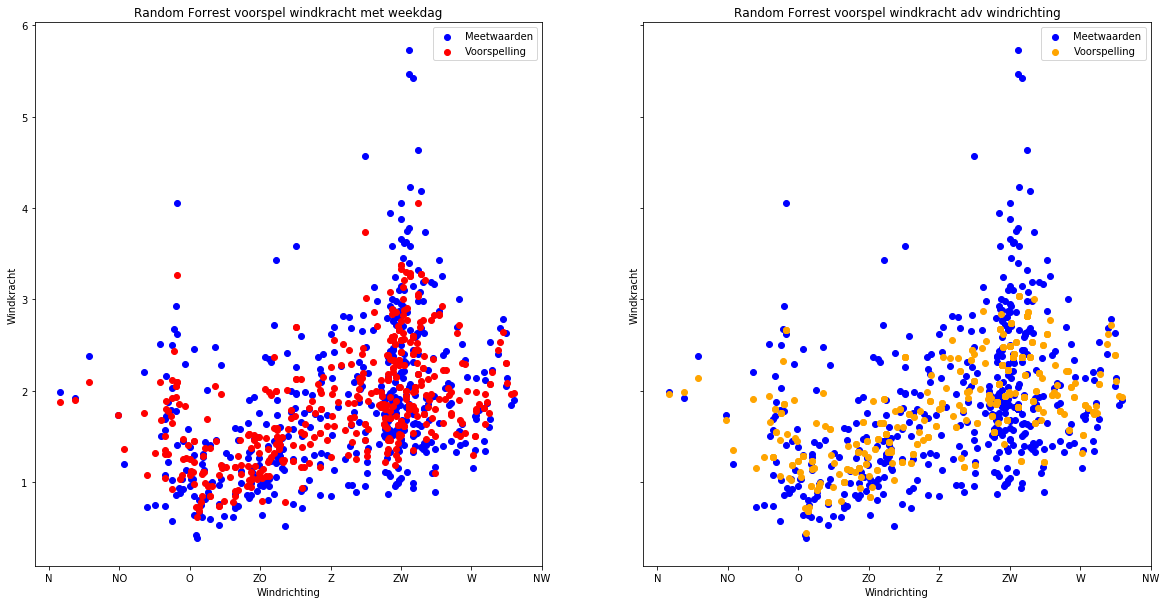

In [223]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,10))

s1 = ax1.scatter(dfdaily['WRFix'],  dfdaily['WK'], color = 'blue')
s2 = ax1.scatter(dfdaily['WRFix'],  dfdaily['preWD'], color = "red")
ax1.set_title('Random Forrest voorspel windkracht met weekdag')
ax1.set_xlabel("Windrichting")
ax1.set_ylabel("Windkracht")
ax1.set_xticks([0, 45, 90, 135, 180, 225, 270, 315])
ax1.set_xticklabels(('N','NO' , 'O','ZO' ,'Z' ,'ZW','W','NW'))
ax1.legend([s1,s2],['Meetwaarden', 'Voorspelling'], loc="upper right")

s3 = ax2.scatter(dfdaily['WRFix'],  dfdaily['WK'], color = 'blue')
s4 = ax2.scatter(dfdaily['WRFix'],  dfdaily['preWKbin'], color = "orange")
ax2.set_title('Random Forrest voorspel windkracht adv windrichting')
ax2.set_xlabel("Windrichting")
ax2.set_ylabel("Windkracht")
ax2.set_xticks([0, 45, 90, 135, 180, 225, 270, 315])
ax2.set_xticklabels(('N','NO' , 'O','ZO' ,'Z' ,'ZW','W','NW'))
ax2.legend([s3,s4],['Meetwaarden', 'Voorspelling'], loc="upper right")

In [224]:
dfdaily['WD error'] = (dfdaily['WK'] - dfdaily['preWD']).abs()
dfdaily.mean()

totaal meldingen    3761.470696
aantal storingen       1.621795
WK                     1.826941
WRFix                211.770604
N                      0.001832
NO                     0.004579
O                      0.062271
ZO                     0.069597
Z                      0.060440
ZW                     0.757326
W                      0.041209
NW                     0.002747
PreSto                 1.598900
PreWR                211.751085
preWK                  1.829038
wk error               0.187650
wk error met wr        0.186608
preWKbin               1.826148
weekdag                3.000000
maandag                0.142857
dinsdag                0.142857
woensdag               0.142857
donderdag              0.142857
vrijdag                0.142857
zaterdag               0.142857
zondag                 0.142857
preWD                  1.829467
WD error               0.128057
dtype: float64

In [225]:
dfdaily.head()

,totaal meldingen,aantal storingen,WK,WRFix,N,NO,O,ZO,Z,ZW,...,weekdag,maandag,dinsdag,woensdag,donderdag,vrijdag,zaterdag,zondag,preWD,WD error
2015-12-12,8,0,1.800000,230.0,0,0,0,0,0,1,...,5,0,0,0,0,0,1,0,1.839089,3.908903e-02
2015-12-13,4,0,1.800000,230.0,0,0,0,0,0,1,...,6,0,0,0,0,0,0,1,1.838605,3.860517e-02
2015-12-14,86,0,1.800000,230.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1.800000,1.998401e-15
2015-12-15,5995,0,1.349546,129.0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1.379433,2.988760e-02
2015-12-16,11780,0,2.197656,204.0,0,0,0,0,0,1,...,2,0,0,1,0,0,0,0,1.887453,3.102031e-01


In [226]:
wrtest = Windrichting[Windrichting['Tijd'].dt.date == (np.datetime64('2016-12-17'))]
test = Windrichting['Tijd'].dt.date
wrtest

,index,Tijd,Type,Klasse,Waarde,ID,Omschrijving,Status,Prioriteit,Tijd came,Tijd went,Tijd ack,Gebr.ID,DPE,Storing,WRFix
1312080,1312080,2016-12-17 23:58:33.036,PROCES,NaN,218.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,218.0
1312085,1312085,2016-12-17 23:56:20.764,PROCES,NaN,229.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,229.0
1312090,1312090,2016-12-17 23:53:57.563,PROCES,NaN,240.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,240.0
1312095,1312095,2016-12-17 23:51:42.315,PROCES,NaN,229.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,229.0
1312101,1312101,2016-12-17 23:46:06.721,PROCES,NaN,240.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,240.0
1312119,1312119,2016-12-17 23:29:45.042,PROCES,NaN,228.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,228.0
1312122,1312122,2016-12-17 23:27:04.775,PROCES,NaN,217.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,217.0
1312126,1312126,2016-12-17 23:25:01.571,PROCES,NaN,235.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,235.0
1312130,1312130,2016-12-17 23:21:41.260,PROCES,NaN,224.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,224.0
1312132,1312132,2016-12-17 23:19:36.947,PROCES,NaN,204.0,NaN,Meteo Actuele Windrichting,None,None,None,None,None,0,DB_H61-Meteo-S.Meteodata.Windrichting.Actueel,0,204.0


In [172]:
wrtest.describe()

,index,Klasse,Waarde,ID,Storing,WRFix
count,5.090000e+02,0.0,509.000000,0.0,509.0,509.000000
mean,1.314208e+06,NaN,208.601179,NaN,0.0,208.601179
std,1.608687e+03,NaN,39.702636,NaN,0.0,39.702636
min,1.312080e+06,NaN,60.000000,NaN,0.0,60.000000
25%,1.312665e+06,NaN,201.000000,NaN,0.0,201.000000
50%,1.314206e+06,NaN,223.000000,NaN,0.0,223.000000
75%,1.315850e+06,NaN,234.000000,NaN,0.0,234.000000
max,1.316335e+06,NaN,300.000000,NaN,0.0,300.000000
